<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url,)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
loja['Lojas'] = 'Loja_1'
loja2['Lojas'] = 'Loja_2'
loja3['Lojas'] = 'Loja_3'
loja4['Lojas'] = 'Loja_4'

#Unificando todos os bancos de dados

Banco_de_dados_unificado = pd.concat([loja, loja2, loja3, loja4])
Banco_de_dados_unificado.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Lojas
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1


#1. Análise do faturamento


<Axes: title={'center': 'Comparação do faturamento entre Lojas'}, xlabel='Faturamento', ylabel='Lojas'>

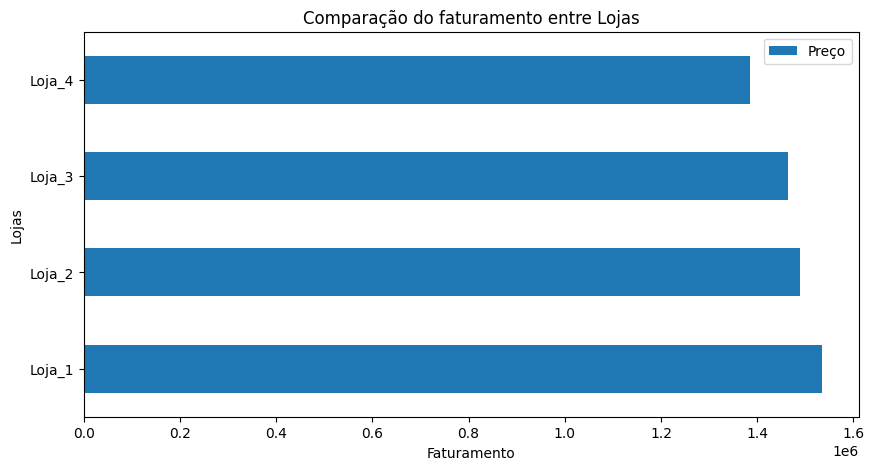

In [3]:
# Separando as colunas de interese do banco de dados unificado
Analise_Faturamento = Banco_de_dados_unificado[['Lojas', 'Preço', 'Data da Compra']]

# Utilizando a função groupby('Lojas') e a função sum() para realizar a soma do faturamento de cada loja e plotando em um grafico
Analise_Faturamento.groupby('Lojas').sum().plot(kind = 'barh', figsize = (10,5), title = 'Comparação do faturamento entre Lojas', xlabel = 'Faturamento')


In [4]:
Analise_Faturamento.groupby('Lojas').sum()

,Preço,Data da Compra
Lojas,,
Loja_1,1534509.12,16/01/202118/05/202215/03/202103/05/202207/11/...
Loja_2,1488459.06,04/08/202126/11/202022/10/202104/05/202226/02/...
Loja_3,1464025.03,17/12/202110/02/202122/01/202322/03/202212/01/...
Loja_4,1384497.58,11/11/202203/01/202025/12/202223/11/202125/04/...


<ipython-input-6-448066c74d4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Faturamento_loja ['Ano'] = Faturamento_loja ['Data da Compra'].str[6:]
<ipython-input-6-448066c74d4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Faturamento_loja2 ['Ano'] = Faturamento_loja2 ['Data da Compra'].str[6:]
<ipython-input-6-448066c74d4c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<Axes: title={'center': 'Faturamento por ano Loja 4'}, xlabel='Faturamento'>

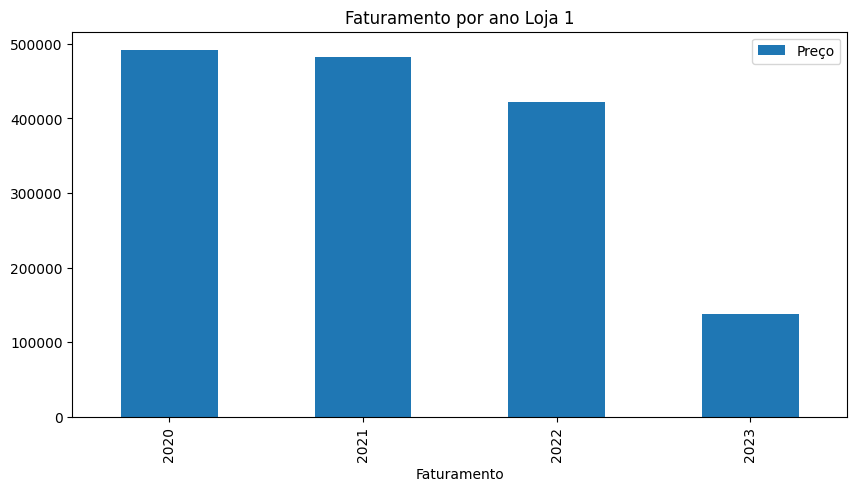

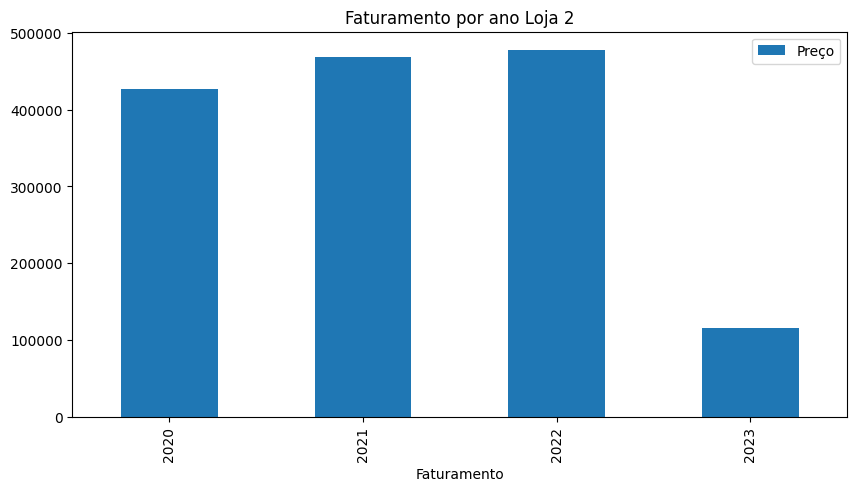

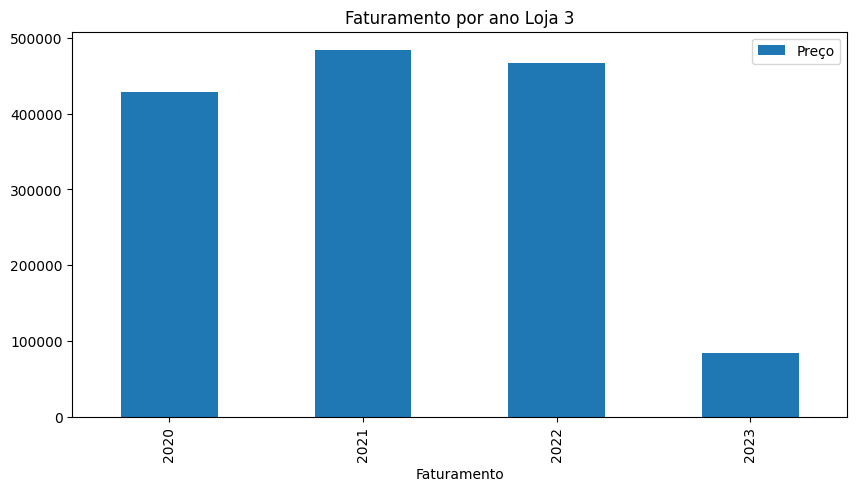

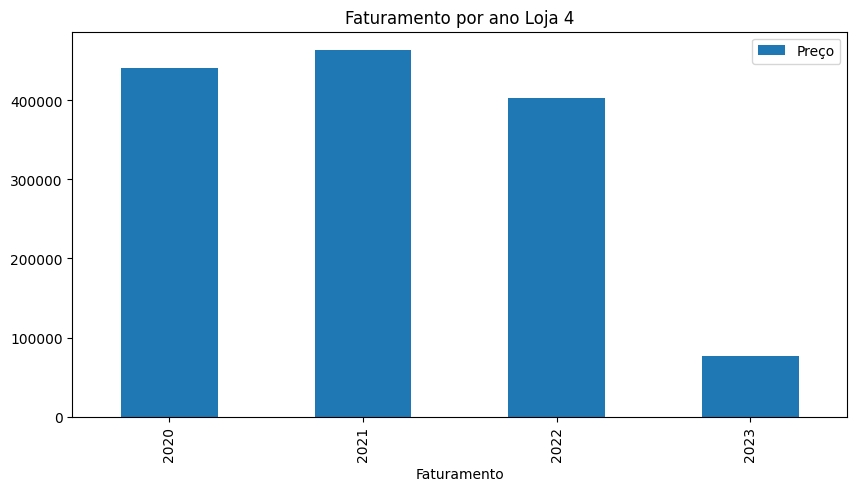

In [6]:
Faturamento_loja = loja [['Preço', 'Data da Compra']]
Faturamento_loja ['Ano'] = Faturamento_loja ['Data da Compra'].str[6:]
Faturamento_loja.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 1', xlabel = 'Faturamento')

Faturamento_loja2 = loja2 [['Preço', 'Data da Compra']]
Faturamento_loja2 ['Ano'] = Faturamento_loja2 ['Data da Compra'].str[6:]
Faturamento_loja2.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 2', xlabel = 'Faturamento')

Faturamento_loja3 = loja3 [['Preço', 'Data da Compra']]
Faturamento_loja3 ['Ano'] = Faturamento_loja3 ['Data da Compra'].str[6:]
Faturamento_loja3.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 3', xlabel = 'Faturamento')

Faturamento_loja4 = loja4 [['Preço', 'Data da Compra']]
Faturamento_loja4 ['Ano'] = Faturamento_loja4 ['Data da Compra'].str[6:]
Faturamento_loja4.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 4', xlabel = 'Faturamento')

Com relação ao faturamento encontramos a loja 1 com o maior faturamento, total de  1.534.509,12. Seguido por loja 2 com 1.488.459,06, loja 3 com  1.464.025,03 e com o menor faturamento registrado a loja 4 com 1.384.497,58. Ficando a loja 4 com um faturamento 9,77% menor que a da loja 1. Analisando o faturamento de cada loja por ano também foi observado que com exceção da loja 2 que teve um aumento de 1,9 % nas vendas do ultimo ano todas as lojas tiveram uma queda nas vendas sendo a loja 4 também com a maior queda, ficando em 13,11%.



# 2. Vendas por Categoria


<Axes: title={'center': 'Vendas por Categoria'}, xlabel='Categorias'>

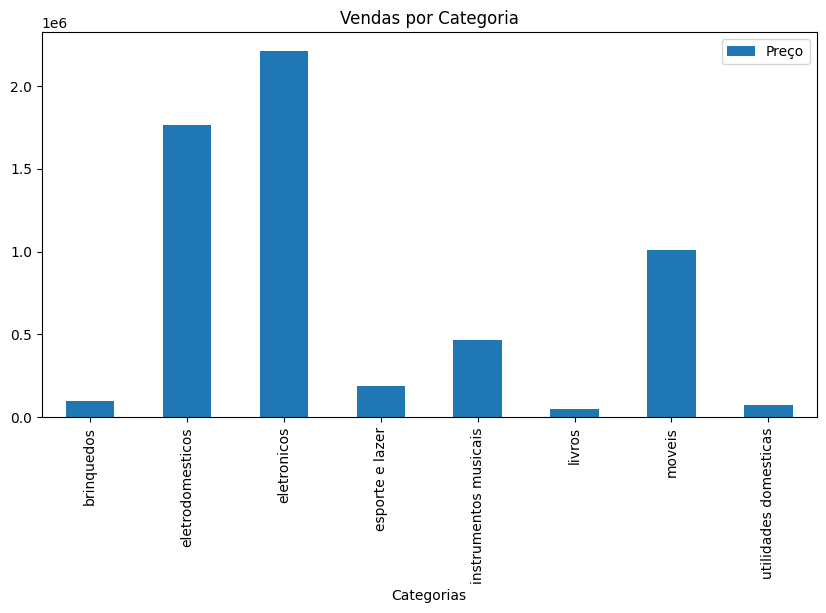

In [10]:
Vendas_por_Categoria = Banco_de_dados_unificado[['Lojas', 'Preço', 'Categoria do Produto']]
Vendas_por_Categoria.groupby('Categoria do Produto').sum().plot(kind = 'bar', figsize = (10,5), title = 'Vendas por Categoria', xlabel = 'Categorias')


In [72]:
Vendas_por_Categoria_loja1 = loja[[ 'Categoria do Produto','Preço']]
Vendas_por_Categoria_loja1.groupby('Categoria do Produto').sum()#.plot(kind = 'bar')


,Preço
Categoria do Produto,
brinquedos,23993.78
eletrodomesticos,484913.36
eletronicos,572659.23
esporte e lazer,52387.55
instrumentos musicais,121731.69
livros,11713.92
moveis,250178.11
utilidades domesticas,16931.48


In [71]:
Vendas_por_Categoria_loja2 = loja2[[ 'Categoria do Produto','Preço']]
Vendas_por_Categoria_loja2.groupby('Categoria do Produto').sum()#.plot(kind = 'bar')

,Preço
Categoria do Produto,
brinquedos,21262.21
eletrodomesticos,464758.13
eletronicos,547773.71
esporte e lazer,46326.09
instrumentos musicais,139987.03
livros,13454.35
moveis,235234.68
utilidades domesticas,19662.86


In [73]:
Vendas_por_Categoria_loja3 = loja3[[ 'Categoria do Produto','Preço']]
Vendas_por_Categoria_loja3.groupby('Categoria do Produto').sum()#.plot(kind = 'bar')

,Preço
Categoria do Produto,
brinquedos,25869.20
eletrodomesticos,438984.89
eletronicos,547699.92
esporte e lazer,47456.10
instrumentos musicais,103174.45
livros,12664.70
moveis,268095.56
utilidades domesticas,20080.21


In [74]:
Vendas_por_Categoria_loja4 = loja4[[ 'Categoria do Produto','Preço']]
Vendas_por_Categoria_loja4.groupby('Categoria do Produto').sum()#.plot(kind = 'bar')

,Preço
Categoria do Produto,
brinquedos,27015.67
eletrodomesticos,377680.65
eletronicos,545966.86
esporte e lazer,44465.65
instrumentos musicais,100136.50
livros,12427.77
moveis,256705.65
utilidades domesticas,20098.83


Em vendas por categoria foi observado que as categorias mais vendidas são as de Eletronicos, Eletrodomesticos, móveis e instrumentos musicais. Esse padrão se segue em todas as lojas, com pequenas diferenças entre elas.

# 3. Média de Avaliação das Lojas

In [12]:
loja ['Avaliação da compra'].mean()

np.float64(3.976685036032217)

In [13]:
loja2 ['Avaliação da compra'].mean()

np.float64(4.037303942348453)

In [14]:
loja3 ['Avaliação da compra'].mean()

np.float64(4.048325561678677)

In [15]:
loja4 ['Avaliação da compra'].mean()

np.float64(3.9957591178965224)

<Axes: title={'center': 'Média de avaliação das lojas'}, xlabel='Faturamento'>

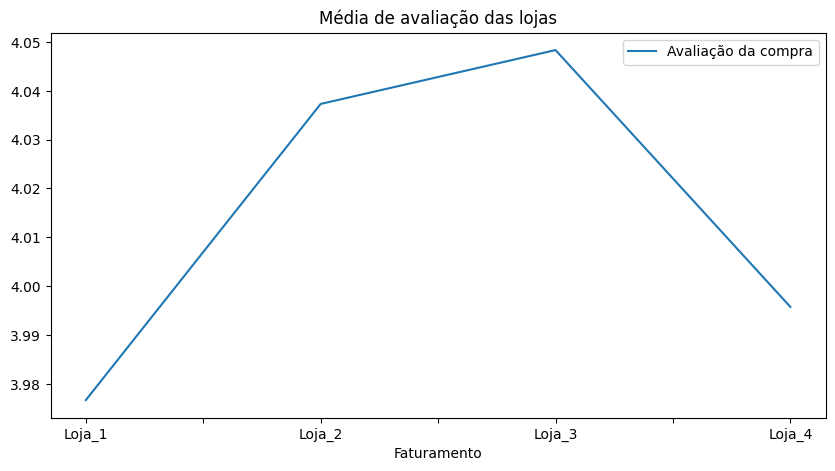

In [16]:
Media_avaliação_lojas = Banco_de_dados_unificado[['Lojas', 'Avaliação da compra']]
Media_avaliação_lojas.groupby('Lojas').mean().plot(kind = 'line', figsize = (10,5), title = 'Média de avaliação das lojas', xlabel = 'Faturamento')


In [17]:
loja ['Avaliação da compra'].value_counts()

,count
Avaliação da compra,
5,1292
4,444
1,319
3,218
2,86


In [18]:
loja2 ['Avaliação da compra'].value_counts()

,count
Avaliação da compra,
5,1302
4,482
1,273
3,209
2,93


In [19]:
loja3 ['Avaliação da compra'].value_counts()

,count
Avaliação da compra,
5,1356
4,434
1,297
3,193
2,79


In [20]:
loja4 ['Avaliação da compra'].value_counts()

,count
Avaliação da compra,
5,1300
4,453
1,310
3,210
2,85


Na média de avaliação a loja 3 foi a campeã com melhor desempenho atingindo média de 4,05 seguida da loja 2 com 4,04 pontos. Já as lojas com pior avaliação foram a loja 1 com 3,98 seguida da loja 4 com 3,99 pontos.

# 4. Produtos Mais e Menos Vendidos

<Axes: title={'center': 'Produtos mais e menos vendidos'}, xlabel='Faturamento'>

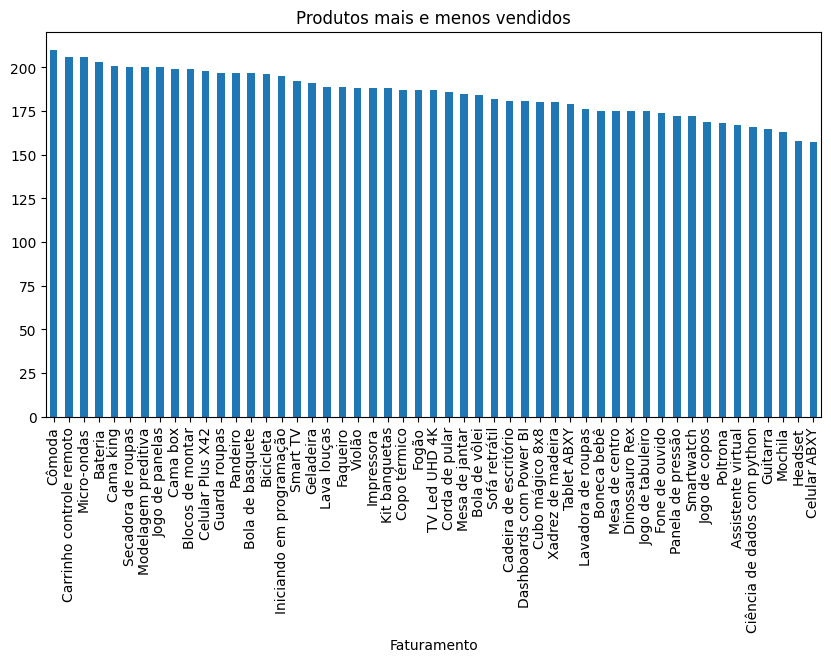

In [21]:
Vendas_de_produtos = Banco_de_dados_unificado[['Lojas', 'Produto']]
Vendas_de_produtos['Produto'].value_counts().plot(kind = 'bar', figsize = (10,5), title = 'Produtos mais e menos vendidos', xlabel = 'Faturamento')

Foi realizado um grafico para avaliar os produtos mais e menos vendidos para conhecimento

# 5. Frete Médio por Loja


<Axes: title={'center': 'Média de avaliação das lojas'}, xlabel='Faturamento'>

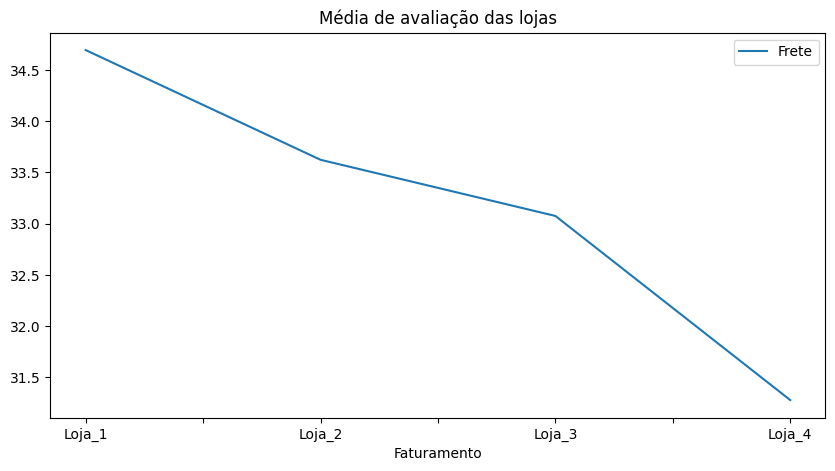

In [22]:
Frete_medio_por_loja = Banco_de_dados_unificado[['Lojas', 'Frete']]
Frete_medio_por_loja.groupby('Lojas').mean().plot(kind = 'line', figsize = (10,5), title = 'Média de avaliação das lojas', xlabel = 'Faturamento')


In [23]:
loja ['Frete'].mean()

np.float64(34.69180491551149)

In [24]:
loja2 ['Frete'].mean()

np.float64(33.62194065817927)

In [25]:
loja3 ['Frete'].mean()

np.float64(33.07446427411743)

In [26]:
loja4 ['Frete'].mean()

np.float64(31.278997081841727)

No frete médio por loja foi encontrado o menor frete para a loja 4 e o maior frete para a loja 1 com diferença entre elas de 10,93%

#Conclusão:

Com base nos dados analisados, a Loja 4 é a mais vulnerável. Apesar do seu  menor custo de frete, o seu baixo faturamento e a maior queda nas vendas no último ano além de avaliações medianas, apontam para um desempenho insatisfatório com relação as demais lojas. Por estes aspectos,  mostram que a loja 4 tem dificuldades significativas para sustentar-se competitiva no mercado em relação as demais lojas.
Logo de um ponto de vista estratégico e com base nos dados disponíveis avaliados, a recomendação seria considerar a venda da Loja 4.
